In [ ]:
# Load the autoreload extension
%load_ext autoreload

# Set autoreload to automatically reload all modules
%autoreload 2

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import os


# Set the working directory to the parent directory
parent_directory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
os.chdir(parent_directory)

from models.DecisionTree.DecisionTree import DecisionTree

# Verify the current working directory
print("Current working directory:", os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working directory: /


In [416]:
# define custom decision tree depth function
def count_depth(d):
    if not isinstance(d, dict) or not d:
        return 0
    return 1 + max(count_depth(v) for v in d.values())

In [417]:
breast_cancer = load_breast_cancer(as_frame=True)
df_breast_cancer = breast_cancer.data
arr_features = np.array(df_breast_cancer.copy())
arr_features.shape
arr_target = np.array(breast_cancer.target.copy())
arr_target.shape

(569,)

In [418]:
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [420]:
# Build the decision tree
DT = DecisionTree()
custom_tree = DT.fit(arr_features, arr_target, max_depth=20, num_features=1)
depth = count_depth(custom_tree)
depth

TypeError: DecisionTree.fit() got an unexpected keyword argument 'num_features'

In [414]:
custom_tree

{'leaf_node': 0,
 'feature': 22,
 'threshold': np.float64(105.95),
 'entropy': np.float64(0.9526351224018599),
 'information_gain': 10000,
 'left': {'leaf_node': 0,
  'feature': 22,
  'threshold': np.float64(117.45),
  'entropy': np.float64(0.5559671540224538),
  'information_gain': np.float64(0.23221044923081013),
  'left': {'leaf_node': 0,
   'feature': 19,
   'threshold': np.float64(0.001547),
   'entropy': np.float64(0.09362545803956356),
   'information_gain': np.float64(0.07712912569127928),
   'left': {'leaf_node': 1,
    'entopy': 0,
    'parent_entropy': 0,
    'weighted_entropy': 0.0,
    'information_gain': 0.0,
    'class_perc': np.float64(0.0),
    'samples': 164,
    'class': np.int64(0)},
   'right': {'leaf_node': 0,
    'feature': 0,
    'threshold': np.float64(18.08),
    'entropy': np.float64(0.9182958340544896),
    'information_gain': np.float64(0.9182958340544896),
    'left': {'leaf_node': 1,
     'entopy': 0,
     'parent_entropy': 0,
     'weighted_entropy': 100

In [260]:
custom_tree

{'leaf_node': 0,
 'feature': 22,
 'threshold': np.float64(105.95),
 'entropy': np.float64(0.9526351224018599),
 'information_gain': 10000,
 'left': {'leaf_node': 0,
  'feature': 22,
  'threshold': np.float64(117.45),
  'entropy': np.float64(0.5559671540224538),
  'information_gain': np.float64(0.6288784176102162),
  'left': {'leaf_node': 0,
   'feature': 19,
   'threshold': np.float64(0.001547),
   'entropy': np.float64(0.09362545803956356),
   'information_gain': np.float64(0.5394708216741695),
   'left': {'leaf_node': 0,
    'feature': 0,
    'threshold': np.float64(12.825),
    'entropy': 0,
    'information_gain': np.float64(0.09362545803956356),
    'left': {'leaf_node': 1,
     'entopy': 0,
     'information_gain': 0.0,
     'class_perc': np.float64(0.0),
     'samples': 163,
     'class': np.int64(0)},
    'right': {'leaf_node': 1,
     'entopy': 0,
     'information_gain': -10000000,
     'class_perc': np.float64(0.0),
     'samples': 1,
     'class': np.int64(0)},
    'samples

In [237]:
custom_tree

In [220]:
custom_tree
# 0.35785

In [358]:
predictions = predict(arr_features, custom_tree)
# number of misclassifications
print(len(arr_target) - sum(predictions == arr_target))

0


In [ ]:

# row 68 is the first row that is not predicted correctly
a = 0
for bool in predictions == arr_target:
    a += 1
    if bool == False:
        print(a)
        break 
arr_features[68,:]

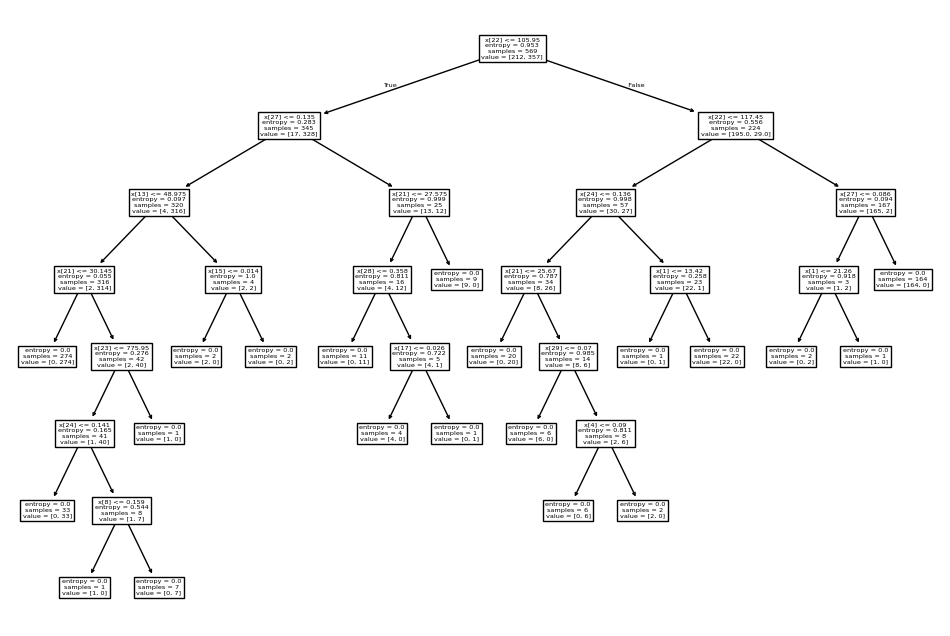

7


In [ ]:
# plot of sklearn decision tree

import matplotlib.pyplot as plt
from sklearn import tree

# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(arr_features, arr_target)


# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf)
plt.show()
print(clf.get_depth())

0.8260105448154658
misclassifications:  99


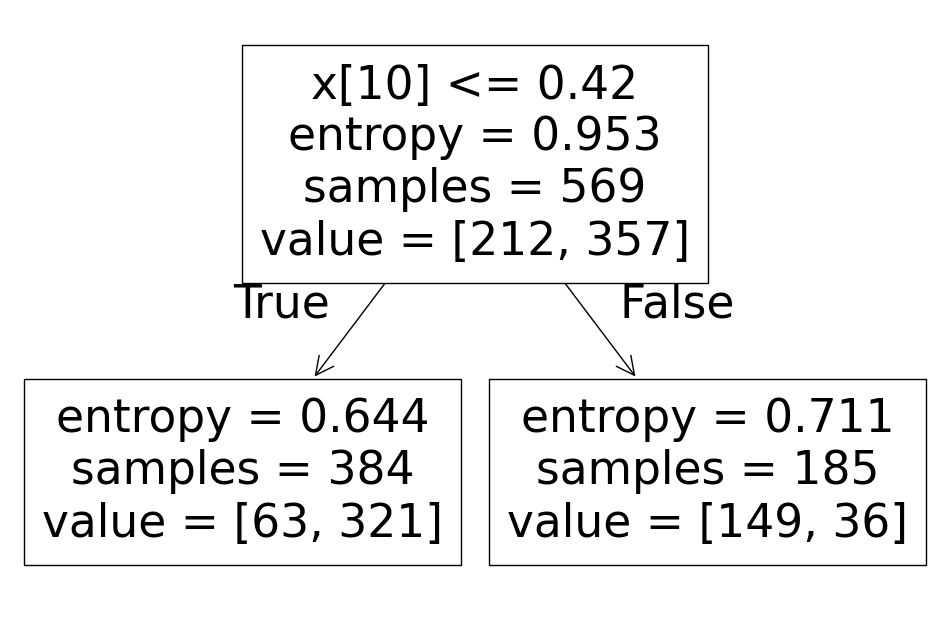

1


In [454]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 1, max_features=1)
# Train the classifier
clf.fit(arr_features, arr_target)
# accuracy of sklearn decision tree
print(sum(clf.predict(arr_features)==arr_target)/len(arr_target))
print(
    "misclassifications: ",
    len(arr_target) - sum(clf.predict(arr_features) == arr_target),
)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf)
plt.show()
print(clf.get_depth())

In [452]:
sum(clf.predict(arr_features) == arr_target) / len(arr_target)

np.float64(0.6274165202108963)

569

# Investigate Misclassifications

In [188]:
custom_tree

In [201]:
arr_target[68]

In [254]:
# loop through dictionary
copy_tree = custom_tree.copy()
sample = arr_features[68].reshape(1, -1)
feature = copy_tree["feature"]
threshold = copy_tree["threshold"]
leaf_node = 0
while leaf_node == 0:
    if sample[0, feature] > threshold:
        copy_tree = copy_tree["left"]
        direction = 'left'
    else:
        copy_tree = copy_tree["right"]
        direction = "right"

    leaf_node = copy_tree["leaf_node"]
    if leaf_node == 1:
        print(direction, " : ", feature, threshold, leaf_node, copy_tree['class'])
        break

    print(direction, " : ", feature, threshold, leaf_node)
    feature = copy_tree["feature"]
    threshold = copy_tree["threshold"]

right  :  22 105.95 0
left  :  27 0.13505 0
right  :  21 27.575 0
left  :  28 0.35785 1 0


In [271]:
# loop through dictionary
copy_tree = custom_tree.copy()
sample = arr_features[68].reshape(1, -1)
feature = copy_tree["feature"]
threshold = copy_tree["threshold"]
leaf_node = 0
while leaf_node == 0:
    if sample[0, feature] > threshold:
        copy_tree = copy_tree["left"]
        direction = "left"
    else:
        copy_tree = copy_tree["right"]
        direction = "right"

    leaf_node = copy_tree["leaf_node"]
    if leaf_node == 1:
        print(direction, " : ", feature, threshold, leaf_node, copy_tree["class"])
        break

    print(direction, " : ", feature, threshold, leaf_node)
    feature = copy_tree["feature"]
    threshold = copy_tree["threshold"]

right  :  22 105.95 0
left  :  27 0.13505 0
right  :  21 27.575 0
left  :  28 0.35785 0
right  :  0 10.224499999999999 1 1


In [272]:
# Select a sample
sample = arr_features[68].reshape(1, -1)

# Get the decision path
node_indicator = clf.decision_path(sample)

# Get the indices of the nodes in the path
node_index = node_indicator.indices

print("Decision path for the sample:")
for node_id in node_index:
    if node_id == node_index[-1]:
        print(f"Node {node_id}: Leaf node")
    else:
        threshold = clf.tree_.threshold[node_id]
        feature = clf.tree_.feature[node_id]
        print(f"Node {node_id}: X[:, {feature}] <= {threshold}")

Decision path for the sample:
Node 0: X[:, 22] <= 105.95000076293945
Node 1: X[:, 27] <= 0.13505000621080399
Node 15: X[:, 21] <= 27.575000762939453
Node 16: X[:, 28] <= 0.35785000026226044
Node 18: X[:, 17] <= 0.02594500035047531
Node 20: Leaf node


In [ ]:
arr_features[68, :]

In [374]:
import random

random.sample(range(1, arr_features.shape[1]+1), 5)

[6, 27, 26, 25, 16]

In [384]:
arr_features[:, [6, 27, 26, 25, 16]]

array([[0.3001 , 0.2654 , 0.7119 , 0.6656 , 0.05373],
       [0.0869 , 0.186  , 0.2416 , 0.1866 , 0.0186 ],
       [0.1974 , 0.243  , 0.4504 , 0.4245 , 0.03832],
       ...,
       [0.09251, 0.1418 , 0.3403 , 0.3094 , 0.0473 ],
       [0.3514 , 0.265  , 0.9387 , 0.8681 , 0.07117],
       [0.     , 0.     , 0.     , 0.06444, 0.     ]])

In [386]:
arr_features[1, 6]

np.float64(0.0869)

In [391]:
for x in range(10):
    if x == 5:
        continue
    print(x)

0
1
2
3
4
6
7
8
9


In [394]:
num_features = 5
feature_ids = [1,2]
for feature_ind in range(num_features):
    if feature_ids is not None and feature_ind not in feature_ids:
        continue
    print(feature_ind)

1
2


In [396]:
def _feature_random(num_features, arr_features):
    """
    Randomly select a subset of features to consider for splitting.

    Parameters:
        num_features (int): The total number of features in the dataset.

    Returns:
        list: A list of indices representing the randomly selected features.
    """

    return random.sample(range(1, arr_features.shape[1] + 1), num_features)

In [399]:
_feature_random(5, arr_features)

[13, 1, 25, 16, 5]

In [400]:
feature_ids = None if num_features == None else _feature_random(5, arr_features)

In [401]:
feature_ids

[8, 27, 21, 4, 24]

In [458]:
import numpy as np

# Original data
data = np.array([1, 2, 3, 4, 5])

# Bootstrap sample
bootstrap_sample = np.random.choice(data, size=len(data), replace=True)

print(bootstrap_sample)

[4 1 2 1 1]


In [469]:
data = np.append(arr_features, arr_target.reshape(-1, 1), axis=1)
indices = np.random.choice(data.shape[0], size=data.shape[0], replace=True)
bootstrap_sample = data[indices]
bootstrap_sample

array([[1.497e+01, 1.695e+01, 9.622e+01, ..., 2.404e-01, 6.428e-02,
        1.000e+00],
       [1.373e+01, 2.261e+01, 9.360e+01, ..., 3.596e-01, 1.431e-01,
        0.000e+00],
       [1.346e+01, 1.875e+01, 8.744e+01, ..., 3.518e-01, 8.665e-02,
        1.000e+00],
       ...,
       [1.630e+01, 1.570e+01, 1.047e+02, ..., 2.300e-01, 7.230e-02,
        1.000e+00],
       [2.309e+01, 1.983e+01, 1.521e+02, ..., 2.908e-01, 7.277e-02,
        0.000e+00],
       [1.075e+01, 1.497e+01, 6.826e+01, ..., 2.300e-01, 6.769e-02,
        1.000e+00]])

In [470]:
indices

array([169,  14, 526, 224, 484, 389, 380, 564, 411, 428, 413,  35, 544,
       114, 132, 384, 420, 307,  85, 383, 453, 242,  23, 422, 487, 230,
       388, 267, 429, 349, 559, 478, 532, 220, 295, 439, 359, 264, 514,
       228,  31, 379, 154, 322, 438, 325, 319, 125, 537,  74, 380, 357,
       506, 100, 222, 444, 314, 227, 322, 216, 263, 256, 465, 308, 233,
       465, 233, 555,  23, 204, 269, 362, 336, 218, 187, 459, 180, 430,
       167, 288, 294, 449, 420, 360, 176, 113, 549, 361, 236,  47, 172,
        90, 509, 134, 232, 156, 410, 218,  55, 148, 419, 565,  88, 104,
        79, 335, 476, 137, 417, 422,  40, 154,  10, 463, 340, 395,  47,
       327, 144,  84, 170, 504, 488, 322, 201,   6,   5, 200, 219, 114,
        95, 487, 551, 289,  94, 343, 400,   2, 463, 294,   5, 291,  22,
       454, 379, 231, 210,  98, 323, 426, 276,  81, 139, 314, 494,  69,
       306, 464, 131, 531, 102, 269, 485, 462, 397,  23, 206, 141, 246,
       447, 506, 206, 468, 458, 447,  17, 193, 471, 329, 282, 25

In [462]:
arr_features.shape

(569, 30)

In [475]:
data[np.array([0, 0])]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01,
        0.000e+00],
       [1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01,
        0.000e+00]])

In [474]:
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [476]:
X_sample = data[:, :-1]
y_sample = data[:, -1]

In [480]:
arr_features

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [481]:
# create a array of indices of the same size as the data, with replacement
indices = np.random.choice(data.shape[0], size=data.shape[0], replace=True)
# create a bootstrap sample using the indices
bootstrap_sample = data[indices]
X_sample = bootstrap_sample[:, :-1]
y_sample = bootstrap_sample[:, -1]

In [487]:
{1: 1, 6: 2, 3: 3} == {1: 1, 2: 2, 3: 3}

False

In [ ]:
array_1 = np.array([1, 0, 0, 0, 0])
array_2 = np.array([1, 1, 0, 0, 0])
array_lst = [array_1, array_2]
bool_array = np.mean(array_lst, axis=0)>0.5
test = np.zeros(len(array_1))
test[bool_array] = 1
test
# (array_1 + array_2)/2

array([1., 0., 0., 0., 0.])

In [ ]:
        n = len(y)
        ones_vector = np.ones(n)
        cost_function = 1 / n * ones_vector@np.dot((prediction - y).T, (prediction - y))